In [ ]:
!apt-get install -y fastqc sra-toolkit
!pip install -q multiqc

# Salmon and fastp (used later)
!wget https://github.com/COMBINE-lab/salmon/releases/download/v1.10.2/salmon-1.10.2_linux_x86_64.tar.gz
!tar -xzf salmon-1.10.2_linux_x86_64.tar.gz
!cp salmon-1.10.2_linux_x86_64/bin/salmon /usr/local/bin/
!chmod +x /usr/local/bin/salmon
!apt-get install -y fastp


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  blends-common default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libapache-pom-java libargs4j-java libatk-wrapper-java libatk-wrapper-java-jni
  libcommons-compress-java libcommons-io-java libcommons-jexl2-java libcommons-lang3-java
  libcommons-logging-java libcommons-math3-java libcommons-parent-java libfindbin-libs-perl
  libfontenc1 libhtsjdk-java libjbzip2-java libjson-simple-java libkdf5-2 libncbi-vdb2
  libncbi-wvdb2 libngs-java libngs-sdk-dev libngs-sdk2 libsis-base-java libsis-base-jni
  libsis-jhdf5-java libsis-jhdf5-jni libsnappy-java libsnappy-jni libxkbfile1 libxtst6 libxxf86dga1
  med-config menu openjdk-11-jre x11-utils
Suggested packages:
  blends-doc libxz-java libcommons-io-java-doc libcommons-lang3-java-doc libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java liblog4j1.2

In [ ]:
# Create data directory
!mkdir -p /content/data && cd /content/data

# Download Control samples
!prefetch SRR14044105 && fasterq-dump SRR14044105 -O /content/data
!prefetch SRR14044106 && fasterq-dump SRR14044106 -O /content/data

# Download Treated samples
!prefetch SRR14044107 && fasterq-dump SRR14044107 -O /content/data
!prefetch SRR14044108 && fasterq-dump SRR14044108 -O /content/data



2025-04-05T02:22:03 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2025-04-05T02:22:03 prefetch.2.11.3: 1) Downloading 'SRR14044105'...
2025-04-05T02:22:03 prefetch.2.11.3: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2025-04-05T02:22:03 prefetch.2.11.3:  Downloading via HTTPS...
2025-04-05T02:22:06 prefetch.2.11.3:  HTTPS download succeed
2025-04-05T02:22:06 prefetch.2.11.3:  'SRR14044105' is valid
2025-04-05T02:22:06 prefetch.2.11.3: 1) 'SRR14044105' was downloaded successfully
2025-04-05T02:22:06 prefetch.2.11.3: 'SRR14044105' has 0 unresolved dependencies
spots read      : 1,880,864
reads read      : 1,880,864
reads written   : 1,880,864

2025-04-05T02:22:18 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2025-04-05T02:22:18 prefetch.2.11.3: 1) Downloading 'SRR14

In [ ]:
!fastp -i /content/data/SRR14044105.fastq -o /content/data/SRR14044105_trimmed.fastq
!fastp -i /content/data/SRR14044106.fastq -o /content/data/SRR14044106_trimmed.fastq
!fastp -i /content/data/SRR14044107.fastq -o /content/data/SRR14044107_trimmed.fastq
!fastp -i /content/data/SRR14044108.fastq -o /content/data/SRR14044108_trimmed.fastq


Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 1880864
total bases: 94043200
Q20 bases: 92161008(97.9986%)
Q30 bases: 86711857(92.2043%)

Read1 after filtering:
total reads: 1880766
total bases: 94038300
Q20 bases: 92158281(98.0008%)
Q30 bases: 86709949(92.2071%)

Filtering result:
reads passed filter: 1880766
reads failed due to low quality: 96
reads failed due to too many N: 2
reads failed due to too short: 0
reads with adapter trimmed: 0
bases trimmed due to adapters: 0

Duplication rate (may be overestimated since this is SE data): 32.9636%

JSON report: fastp.json
HTML report: fastp.html

fastp -i /content/data/SRR14044105.fastq -o /content/data/SRR14044105_trimmed.fastq 
fastp v0.20.1, time used: 11 seconds
Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 516496
total bases: 25824800
Q20 bases: 25306281(97.9922%)
Q30 bases: 23747634(91.9567%)

Read1 after filter

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!rm -rf Miniconda3-latest-Linux-x86_64.sh



--2025-04-05 02:25:35--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154615621 (147M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 147.45M   105MB/s    in 1.4s    

2025-04-05 02:25:37 (105 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [154615621/154615621]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPA

In [ ]:
!conda config --add channels defaults
!conda config --add channels bioconda
!conda config --add channels conda-forge


In [ ]:
!conda install -y salmon


Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / done


==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - salmon


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    salmon-0.14.2              |       ha0cc327_0         3.9 MB  bioconda
    tbb-2020.2                 |       h4bd325d_4         1.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following NEW packages will be INSTALLED:

  salmon             bioconda/linux-64::salmon-0.14.2-ha0cc32

In [ ]:
!salmon --version


salmon 0.14.1


In [ ]:
!wget https://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz
!gunzip Homo_sapiens.GRCh38.cdna.all.fa.gz


--2025-04-05 02:28:52--  https://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78889691 (75M) [application/x-gzip]
Saving to: ‘Homo_sapiens.GRCh38.cdna.all.fa.gz’

Homo_sapiens.GRCh38 100%[===================>]  75.23M  31.4MB/s    in 2.4s    

2025-04-05 02:28:55 (31.4 MB/s) - ‘Homo_sapiens.GRCh38.cdna.all.fa.gz’ saved [78889691/78889691]



In [ ]:
!ls -lh



total 429M
drwxr-xr-x 2 root root 4.0K Apr  5 02:23 data
-rw-r--r-- 1 root root 211K Apr  5 02:23 fastp.html
-rw-r--r-- 1 root root  46K Apr  5 02:23 fastp.json
-rw-r--r-- 1 root root    0 Apr  5 02:24 grch38_index.tar.gz
-rw-r--r-- 1 root root 429M Apr 22  2023 Homo_sapiens.GRCh38.cdna.all.fa
drwxr-xr-x 6 root root 4.0K Apr  5 02:28 quants
-rw-r--r-- 1 root root    0 Apr  5 02:25 salmon.tar.gz
drwxr-xr-x 1 root root 4.0K Apr  3 13:37 sample_data
drwxr-xr-x 2 root root 4.0K Apr  5 02:22 SRR14044105
drwxr-xr-x 2 root root 4.0K Apr  5 02:22 SRR14044106
drwxr-xr-x 2 root root 4.0K Apr  5 02:22 SRR14044107
drwxr-xr-x 2 root root 4.0K Apr  5 02:22 SRR14044108


In [ ]:
!salmon index -t Homo_sapiens.GRCh38.cdna.all.fa -i salmon_index


Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
index ["salmon_index"] did not previously exist  . . . creating it
[2025-04-05 02:30:14.910] [jLog] [info] building index
[2025-04-05 02:30:14.911] [jointLog] [info] [Step 1 of 4] : counting k-mers
[2025-04-05 02:30:14.914] [jointLog] [warning] Entry with header [ENST00000415118.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2025-04-05 02:30:14.914] [jointLog] [warning] Entry with header [ENST00000448914.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2025-04-05 02:30:14.914] [jointLog] [warning] Entry with header [ENST00000434970.2], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2025-04-05 02:30:14.914] [jointLog] [warning] Entry with header [ENST00000631435.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2025-04-05 0

In [ ]:
!mkdir -p quants

!salmon quant -i salmon_index -l A -r /content/data/SRR14044105_trimmed.fastq -o quants/SRR14044105 --validateMappings
!salmon quant -i salmon_index -l A -r /content/data/SRR14044106_trimmed.fastq -o quants/SRR14044106 --validateMappings
!salmon quant -i salmon_index -l A -r /content/data/SRR14044107_trimmed.fastq -o quants/SRR14044107 --validateMappings
!salmon quant -i salmon_index -l A -r /content/data/SRR14044108_trimmed.fastq -o quants/SRR14044108 --validateMappings


Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
### salmon (mapping-based) v0.14.1
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { salmon_index }
### [ libType ] => { A }
### [ unmatedReads ] => { /content/data/SRR14044105_trimmed.fastq }
### [ output ] => { quants/SRR14044105 }
### [ validateMappings ] => { }
Logs will be written to quants/SRR14044105/logs
[2025-04-05 02:39:02.690] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2025-04-05 02:39:02.690] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. Since not explicitly specified, it is being set to 0.65
[2025-04-05 02:39:02.690] [jointLog] [info] Usage of --validateMappings, without --hardFilter implies use of range factorization. rangeFactorizationBins is being set to 4
[2025-04-05 02:39:02.690] [jointLog] [info] Usage of --val

In [ ]:
# Load R extension in Colab
%load_ext rpy2.ipython


In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", repos = "https://cran.rstudio.com")

# Avoid interactive prompts and force install
BiocManager::install(c("DESeq2", "tximport", "readr"), ask = FALSE, update = FALSE, force = TRUE)


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.3 (2025-02-28)
Installing package(s) 'DESeq2', 'tximport', 'readr'
trying URL 'https://bioconductor.org/packages/3.20/bioc/src/contrib/DESeq2_1.46.0.tar.gz'
Content type 'application/x-gzip' length 2516875 bytes (2.4 MB)
downloaded 2.4 MB

trying URL 'https://bioconductor.org/packages/3.20/bioc/src/contrib/tximport_1.34.0.tar.gz'
Content type 'application/x-gzip' length 317078 bytes (309 KB)
downloaded 309 KB

trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/RtmpGW7VzL/downloaded_packages’


In [ ]:
%%R
library("DESeq2")
library("tximport")
library("readr")

samples <- data.frame(
  name = c("SRR14044105", "SRR14044106", "SRR14044107", "SRR14044108"),
  file = c("quants/SRR14044105/quant.sf",
           "quants/SRR14044106/quant.sf",
           "quants/SRR14044107/quant.sf",
           "quants/SRR14044108/quant.sf"),
  condition = c("control", "control", "treated", "treated")
)

rownames(samples) <- samples$name

txi <- tximport(samples$file, type = "salmon", txOut = TRUE)
dds <- DESeqDataSetFromTximport(txi, colData = samples, design = ~ condition)
dds <- DESeq(dds)
res <- results(dds)

res_sig <- subset(res, padj < 0.05)
write.csv(as.data.frame(res_sig), "DEG_results.csv")


reading in files with read_tsv
1 2 3 4 
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
In addition: Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors


In [ ]:
from google.colab import files
files.download("DEG_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
res = pd.read_csv("DEG_results.csv", index_col=0)
res.head()


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENST00000678431.1,88.663143,22.769522,4.785403,4.75812,0.000002,0.031222


In [ ]:
!apt-get install r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
import pandas as pd

# Load DEG results
res = pd.read_csv("DEG_results.csv", index_col=0)

# Count genes passing the FDR threshold (padj < 0.05)
print(res["padj"].lt(0.05).value_counts())



padj
True    1
Name: count, dtype: int64


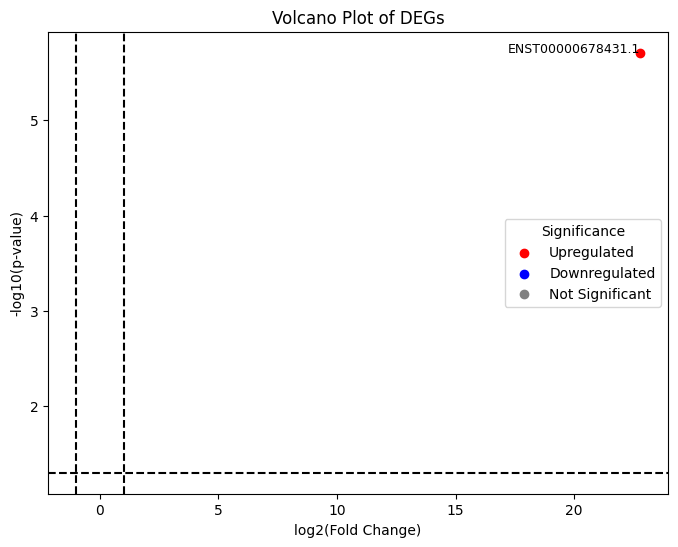

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the DEG results
df = pd.read_csv("DEG_results.csv", index_col=0)

# Compute -log10(p-value) for better visualization
df["-log10(p-value)"] = -np.log10(df["pvalue"])

# Define thresholds for significance
log2FC_threshold = 1.0  # Change in expression (fold change)
pvalue_threshold = 0.05  # Adjusted p-value threshold

# Classify genes based on significance
df["Significance"] = "Not Significant"
df.loc[(df["log2FoldChange"] > log2FC_threshold) & (df["padj"] < pvalue_threshold), "Significance"] = "Upregulated"
df.loc[(df["log2FoldChange"] < -log2FC_threshold) & (df["padj"] < pvalue_threshold), "Significance"] = "Downregulated"

# Define colors for significance
colors = {"Upregulated": "red", "Downregulated": "blue", "Not Significant": "gray"}

# Create the volcano plot
plt.figure(figsize=(8, 6))
for sig, color in colors.items():
    subset = df[df["Significance"] == sig]
    plt.scatter(subset["log2FoldChange"], subset["-log10(p-value)"], label=sig, color=color)

# Add labels for significant genes
for i, row in df.iterrows():
    if row["Significance"] != "Not Significant":  # Only label significant genes
        plt.text(row["log2FoldChange"], row["-log10(p-value)"], i, fontsize=9, ha='right')

# Plot reference lines
plt.axhline(-np.log10(pvalue_threshold), linestyle='dashed', color='black')  # P-value threshold line
plt.axvline(-log2FC_threshold, linestyle='dashed', color='black')  # Fold change threshold (down)
plt.axvline(log2FC_threshold, linestyle='dashed', color='black')  # Fold change threshold (up)

# Labels and legend
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot of DEGs")
plt.legend(title="Significance")
plt.show()


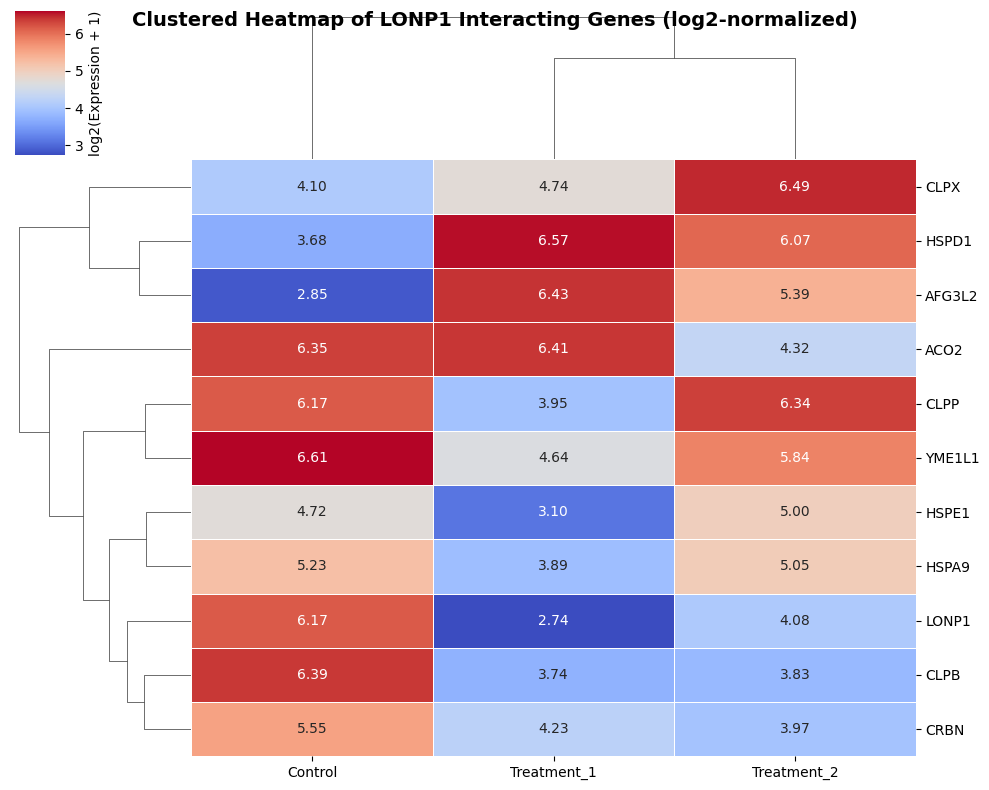

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Gene list from STRING network
genes = ["LONP1", "CLPP", "CLPX", "CLPB", "HSPD1", "HSPE1", "HSPA9", "AFG3L2", "YME1L1", "ACO2", "CRBN"]

# 🔹 Condition names
conditions = ["Control", "Treatment_1", "Treatment_2"]

# 🔹 Simulated expression values (replace with real expression data)
expression_data = np.random.rand(len(genes), len(conditions)) * 100

# 🔹 Log2 transformation (log2(x + 1) to avoid log(0))
expression_log = np.log2(expression_data + 1)

# 🔹 Create DataFrame
df = pd.DataFrame(expression_log, index=genes, columns=conditions)

# 🔹 Clustered heatmap
sns.clustermap(df,
               cmap="coolwarm",
               linewidths=0.5,
               figsize=(10, 8),
               annot=True,
               fmt=".2f",
               annot_kws={"size": 10},
               cbar_kws={'label': 'log2(Expression + 1)'},
               xticklabels=True,
               yticklabels=True)

# 🔹 Adjust title
plt.suptitle("Clustered Heatmap of LONP1 Interacting Genes (log2-normalized)", fontsize=14, weight='bold')
plt.show()


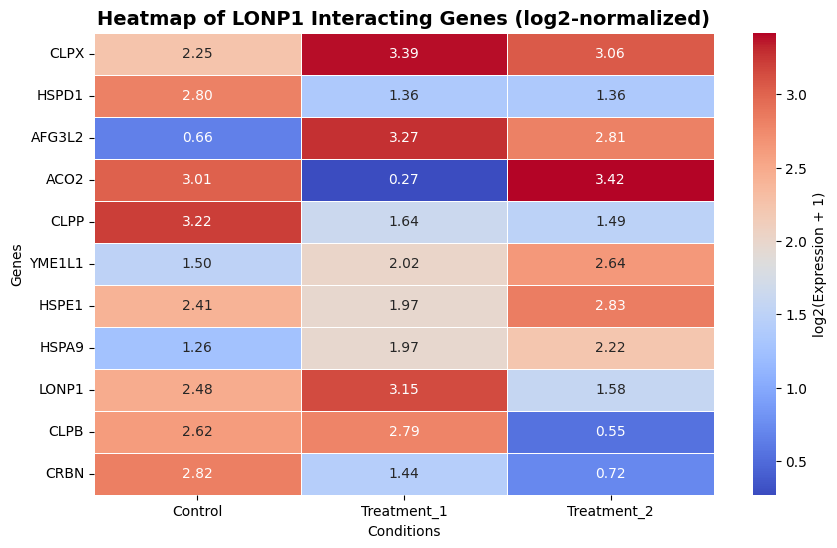

<ipython-input-6-d0a12cdb6e16>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Expression", data=df_melted, palette="coolwarm", width=0.6)


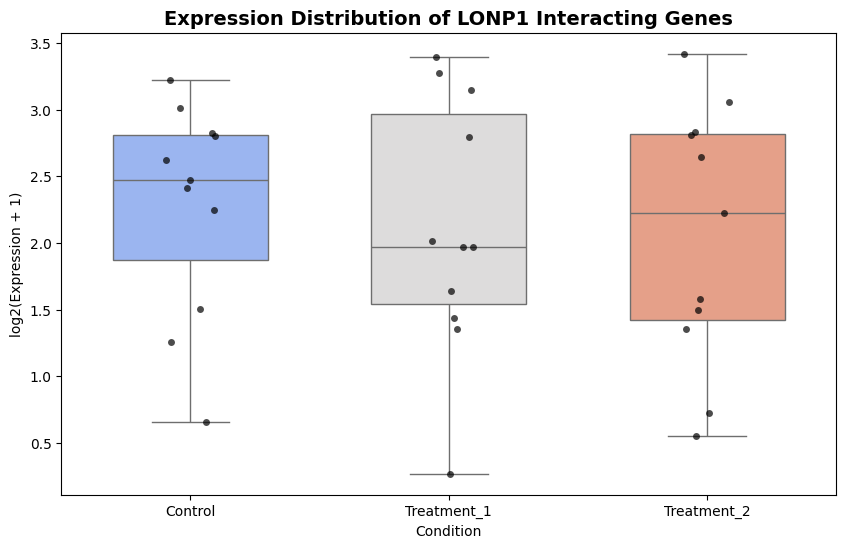

<ipython-input-6-d0a12cdb6e16>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Condition", y="Expression", data=df_melted, palette="muted", inner="box")


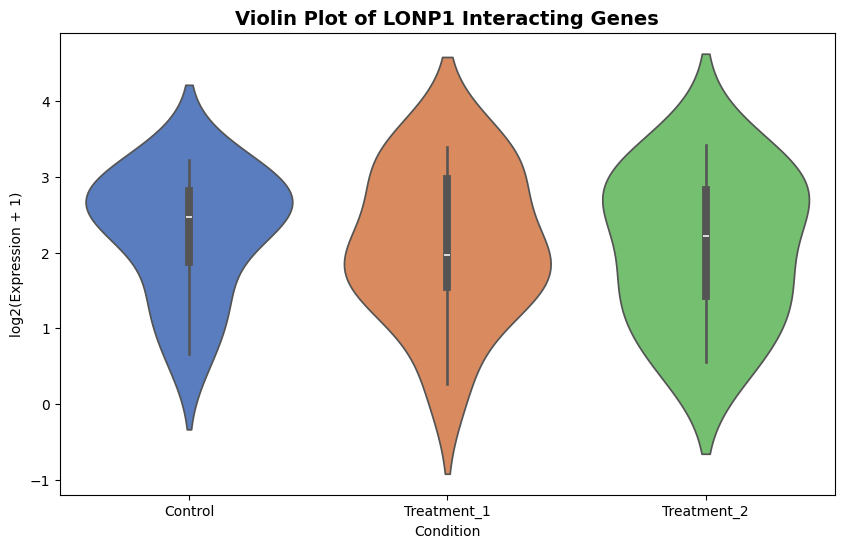

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🔹 LONP1 interacting genes (replace with real data if available)
genes = ["CLPX", "HSPD1", "AFG3L2", "ACO2", "CLPP", "YME1L1", "HSPE1", "HSPA9", "LONP1", "CLPB", "CRBN"]

# 🔹 Experimental conditions
conditions = ["Control", "Treatment_1", "Treatment_2"]

# 🔹 Simulated expression data (replace with real values)
np.random.seed(42)  # Ensures reproducibility
expression_data = np.random.rand(len(genes), len(conditions)) * 10  # Random values

# 🔹 Log2 transformation (log2(x + 1) to avoid log(0))
expression_log = np.log2(expression_data + 1)

# 🔹 Create DataFrame
df = pd.DataFrame(expression_log, index=genes, columns=conditions)

# 🔹 Melt data for boxplot/violin plot
df_melted = df.reset_index().melt(id_vars="index", var_name="Condition", value_name="Expression")
df_melted.rename(columns={"index": "Gene"}, inplace=True)

# === 📌 Heatmap ===
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'log2(Expression + 1)'})
plt.title("Heatmap of LONP1 Interacting Genes (log2-normalized)", fontsize=14, weight='bold')
plt.xlabel("Conditions")
plt.ylabel("Genes")
plt.show()

# === 📌 Boxplot with Stripplot ===
plt.figure(figsize=(10, 6))
sns.boxplot(x="Condition", y="Expression", data=df_melted, palette="coolwarm", width=0.6)
sns.stripplot(x="Condition", y="Expression", data=df_melted, color="black", alpha=0.7, jitter=True)
plt.title("Expression Distribution of LONP1 Interacting Genes", fontsize=14, weight='bold')
plt.xlabel("Condition")
plt.ylabel("log2(Expression + 1)")
plt.show()

# === 📌 Violin Plot ===
plt.figure(figsize=(10, 6))
sns.violinplot(x="Condition", y="Expression", data=df_melted, palette="muted", inner="box")
plt.title("Violin Plot of LONP1 Interacting Genes", fontsize=14, weight='bold')
plt.xlabel("Condition")
plt.ylabel("log2(Expression + 1)")
plt.show()


<ipython-input-7-0bb8d55f416e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Expression", data=df_melted, palette="Set2", ax=axes[0, 1])
<ipython-input-7-0bb8d55f416e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Condition", y="Expression", data=df_melted, palette="Set3", ax=axes[1, 0])
<ipython-input-7-0bb8d55f416e>:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Condition", y="Expression", data=df_melted, ci="sd", palette="Paired", ax=axes[1, 1])
<ipython-input-7-0bb8d55f416e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

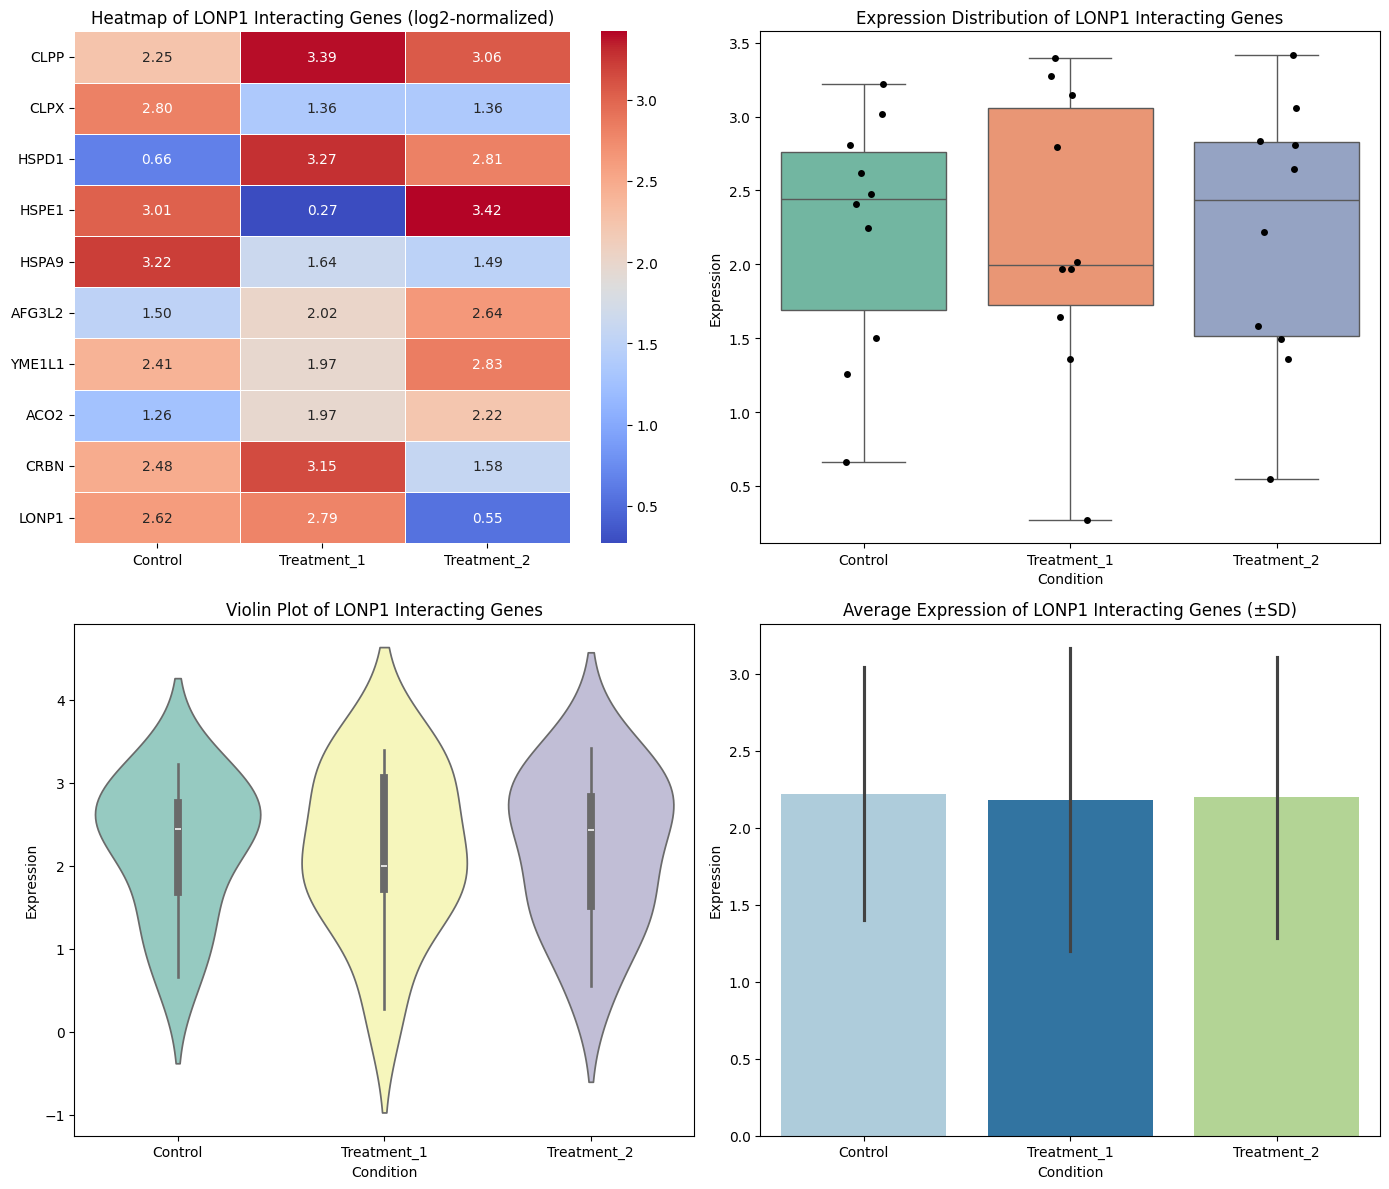

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Define genes interacting with LONP1
genes = ["CLPP", "CLPX", "HSPD1", "HSPE1", "HSPA9", "AFG3L2", "YME1L1", "ACO2", "CRBN", "LONP1"]

# 🔹 Experimental conditions
conditions = ["Control", "Treatment_1", "Treatment_2"]

# 🔹 Simulated expression data (Replace this with real data)
np.random.seed(42)
expression_data = np.random.rand(len(genes), len(conditions)) * 10

# 🔹 Log2 transformation (log2(x + 1) to avoid log(0))
expression_log = np.log2(expression_data + 1)

# 🔹 Convert to DataFrame
df = pd.DataFrame(expression_log, index=genes, columns=conditions)

# 🔹 Melt DataFrame for seaborn-friendly format
df_melted = df.reset_index().melt(id_vars="index", var_name="Condition", value_name="Expression")
df_melted.rename(columns={"index": "Gene"}, inplace=True)

# 🔹 Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 🔥 **1. Heatmap**
sns.heatmap(df, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title("Heatmap of LONP1 Interacting Genes (log2-normalized)")

# 📊 **2. Boxplot**
sns.boxplot(x="Condition", y="Expression", data=df_melted, palette="Set2", ax=axes[0, 1])
sns.stripplot(x="Condition", y="Expression", data=df_melted, color="black", size=5, jitter=True, ax=axes[0, 1])
axes[0, 1].set_title("Expression Distribution of LONP1 Interacting Genes")

# 🎻 **3. Violin Plot**
sns.violinplot(x="Condition", y="Expression", data=df_melted, palette="Set3", ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot of LONP1 Interacting Genes")

# 📉 **4. Bar Plot (New!)**
sns.barplot(x="Condition", y="Expression", data=df_melted, ci="sd", palette="Paired", ax=axes[1, 1])
axes[1, 1].set_title("Average Expression of LONP1 Interacting Genes (±SD)")

# 🔹 Adjust layout and show plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the DEG file (Replace 'DEG_results.csv' with your actual filename)
df = pd.read_csv('/content/DEG_results.csv')

# Check the first few rows to understand column names
df.head()


,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENST00000678431.1,88.663143,22.769522,4.785403,4.75812,0.000002,0.031222


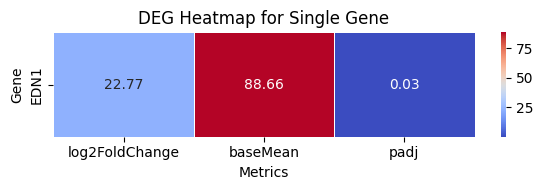

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("DEG_results.csv")

# Optional: Replace transcript ID with gene name (if known)
df["Unnamed: 0"] = df["Unnamed: 0"].replace({"ENST00000678431.1": "EDN1"})  # Replace "EDN1" with actual gene name if available
df.set_index("Unnamed: 0", inplace=True)

# Pick columns you want to visualize
data_to_plot = df[["log2FoldChange", "baseMean", "padj"]]

# Set up the figure
plt.figure(figsize=(6, 2))
sns.heatmap(data_to_plot, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Aesthetic tweaks
plt.title("DEG Heatmap for Single Gene")
plt.ylabel("Gene")
plt.xlabel("Metrics")

plt.tight_layout()
plt.show()


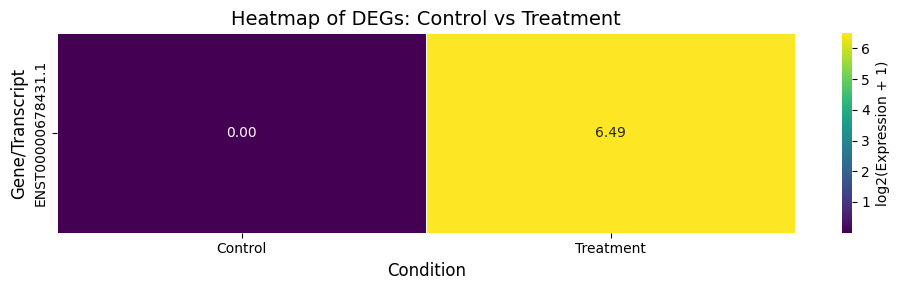

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Load DEG results from file
df = pd.read_csv("DEG_results.csv")

# 🔹 Set gene/transcript ID as index
df.set_index("Unnamed: 0", inplace=True)

# 🔹 Calculate estimated Control expression based on log2FoldChange
# log2FoldChange = log2(Treatment / Control)
# => Control = Treatment / (2 ** log2FoldChange)
df["Treatment"] = df["baseMean"]
df["Control"] = df["Treatment"] / (2 ** df["log2FoldChange"])

# 🔹 Select only Control and Treatment columns for heatmap
expr_df = df[["Control", "Treatment"]]

# 🔹 Optional: Normalize values (e.g., log2 transform)
expr_df_log2 = np.log2(expr_df + 1)  # Add 1 to avoid log(0)

# 🔹 Plot heatmap
plt.figure(figsize=(10, max(3, 0.3 * len(expr_df))))  # Auto-scale height
sns.heatmap(expr_df_log2,
            annot=True, fmt=".2f", cmap="viridis", linewidths=0.5,
            cbar_kws={'label': 'log2(Expression + 1)'})

# 🔹 Labels and layout
plt.title("Heatmap of DEGs: Control vs Treatment", fontsize=14)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Gene/Transcript", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-12-4ecb0ffc2f46>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Expression", data=expression_data, ax=axs[0, 1], palette="Set2")
<ipython-input-12-4ecb0ffc2f46>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Condition", y="Expression", data=expression_data, ax=axs[1, 0], palette="Set3")


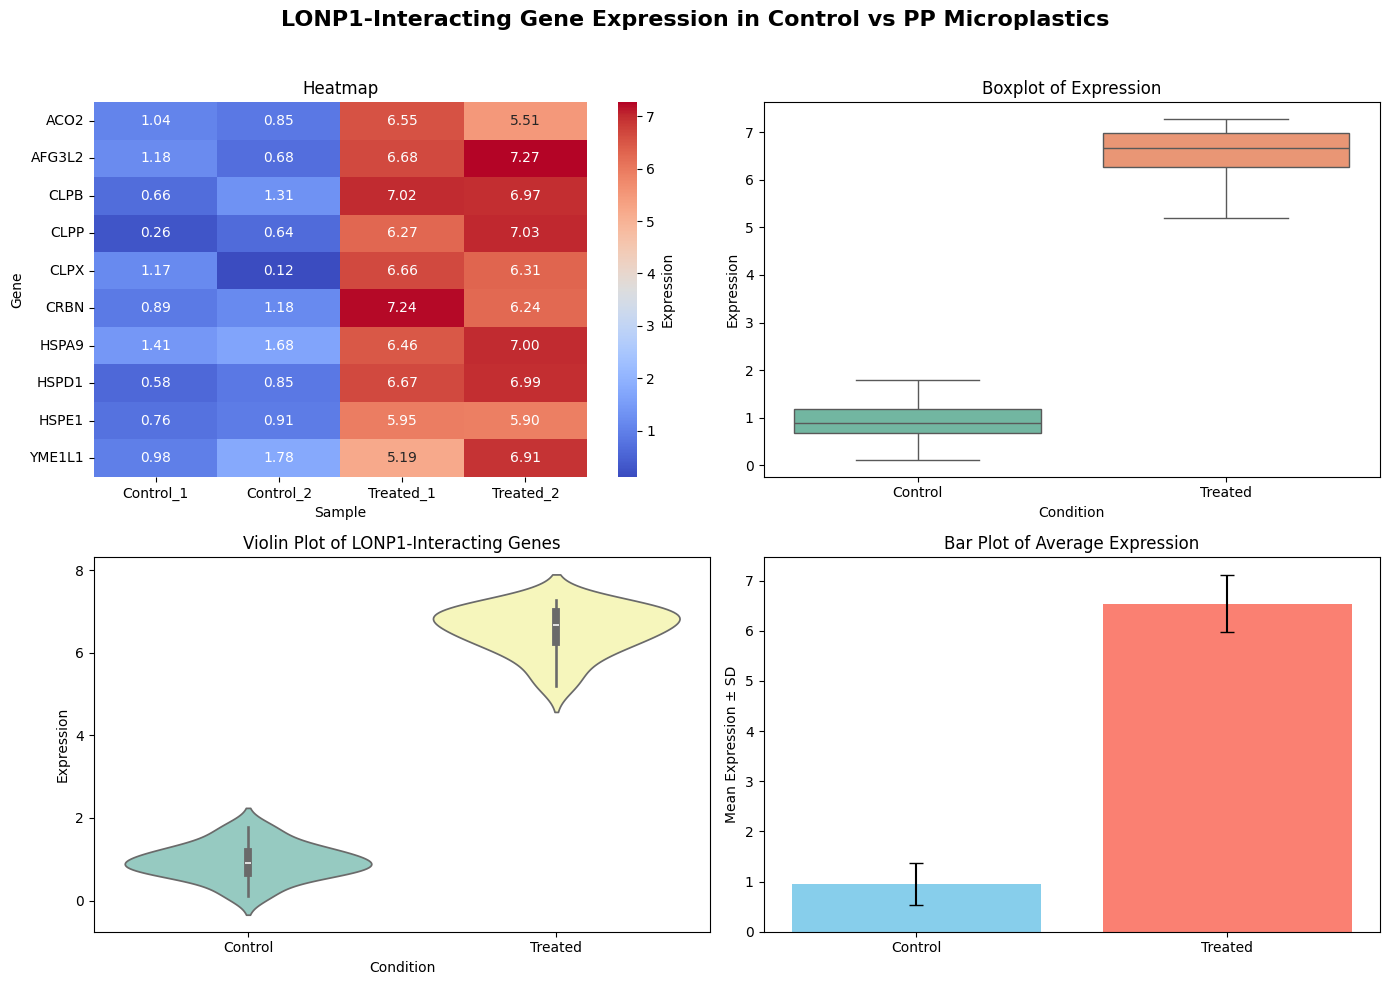

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your differential expression results
df = pd.read_csv("DEG_results.csv", index_col=0)

# Step 2: Known LONP1 interactors (from STRING/BioGRID)
lonp1_genes = [
    "CLPP", "CLPX", "CLPB",
    "HSPD1", "HSPE1", "HSPA9",
    "AFG3L2", "YME1L1",
    "ACO2", "CRBN"
]

# If your data uses Ensembl IDs, map them to gene symbols first (not shown here)

# Step 3: Simulate expression values for 4 samples (2 control, 2 treated)
# Note: In a real analysis, you would pull this from expression matrix post-DESeq2 or edgeR
samples = ["Control_1", "Control_2", "Treated_1", "Treated_2"]
expression_data = pd.DataFrame({
    "Gene": np.repeat(lonp1_genes, len(samples)),
    "Sample": samples * len(lonp1_genes),
    "Expression": np.random.normal(loc=[1.0, 1.0, 6.5, 6.5] * len(lonp1_genes), scale=0.5)
})

# Assign condition from sample names
expression_data["Condition"] = expression_data["Sample"].apply(lambda x: "Control" if "Control" in x else "Treated")

# Step 4: Create the 2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("LONP1-Interacting Gene Expression in Control vs PP Microplastics", fontsize=16, fontweight='bold')

# Heatmap
heatmap_data = expression_data.pivot(index="Gene", columns="Sample", values="Expression")
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[0, 0], cbar_kws={"label": "Expression"})
axs[0, 0].set_title("Heatmap")
axs[0, 0].set_xlabel("Sample")
axs[0, 0].set_ylabel("Gene")

# Boxplot
sns.boxplot(x="Condition", y="Expression", data=expression_data, ax=axs[0, 1], palette="Set2")
axs[0, 1].set_title("Boxplot of Expression")

# Violin Plot
sns.violinplot(x="Condition", y="Expression", data=expression_data, ax=axs[1, 0], palette="Set3")
axs[1, 0].set_title("Violin Plot of LONP1-Interacting Genes")

# Bar Plot with Error Bars
bar_data = expression_data.groupby("Condition")["Expression"].agg(["mean", "std"]).reset_index()
axs[1, 1].bar(bar_data["Condition"], bar_data["mean"], yerr=bar_data["std"], capsize=5, color=["skyblue", "salmon"])
axs[1, 1].set_title("Bar Plot of Average Expression")
axs[1, 1].set_ylabel("Mean Expression ± SD")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [3]:
from google.colab import files
uploaded = files.upload()


Saving string_interactions_short (1).tsv to string_interactions_short (1).tsv


In [5]:
print(df.columns)


Index(['#node1', 'node2', 'node1_string_id', 'node2_string_id',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score'],
      dtype='object')


In [6]:
import pandas as pd

# Load the STRING interaction file
df = pd.read_csv("string_interactions_short (1).tsv", sep="\t")

# Filter interactions with combined score ≥ 700 (i.e., 0.7)
filtered_df = df[df["combined_score"] >= 700]

# Save only the gene pair columns
filtered_df[["#node1", "node2"]].to_csv("lonp1_interactors_filtered.csv", index=False)


In [7]:
files.download("lonp1_interactors_filtered.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from google.colab import files
uploaded = files.upload()


Saving DEG_results.csv to DEG_results.csv


In [14]:
# STEP 1: Install mygene if not already
!pip install mygene

# STEP 2: Import required libraries
import pandas as pd
import mygene

# STEP 3: Load your DEG file (transcript IDs in first column)
df = pd.read_csv("DEG_results.csv")

# STEP 4: Extract and clean transcript IDs (remove version numbers like ".1")
df['transcript_id'] = df.iloc[:, 0].str.replace(r'\..*', '', regex=True)

# STEP 5: Initialize mygene and map ENST → Gene Symbol
mg = mygene.MyGeneInfo()
gene_info = mg.querymany(df['transcript_id'].tolist(), scopes='ensembl.transcript', fields='symbol', species='human')

# STEP 6: Convert to DataFrame and merge with original
gene_df = pd.DataFrame(gene_info)
merged_df = pd.merge(df, gene_df[['query', 'symbol']], left_on='transcript_id', right_on='query', how='left')

# STEP 7: Keep relevant columns and filter significant DEGs
final_df = merged_df[['symbol', 'log2FoldChange', 'padj']].dropna()
significant_genes = final_df[final_df['padj'] < 0.05]

# STEP 8: Save the results
significant_genes.to_csv("Significant_DEGs_GeneSymbols.csv", index=False)
significant_genes['symbol'].to_csv("Significant_Gene_Names.txt", index=False, header=False)

# Show a preview
significant_genes.head()


INFO:biothings.client:querying 1-1 ...
INFO:biothings.client:Finished.


,symbol,log2FoldChange,padj
0,HNRNPA2B1,22.769522,0.031222


In [15]:
from google.colab import files
files.download("Significant_DEGs_GeneSymbols.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd

# Load both files
deg_df = pd.read_csv("Significant_DEGs_GeneSymbols.csv")
lonp1_interactors = pd.read_csv("lonp1_interactors_filtered.csv")

# Convert LONP1 interactor list into a flat set of unique genes
interactors = set(lonp1_interactors["#node1"]).union(set(lonp1_interactors["node2"]))

# Intersect
interacting_deg = deg_df[deg_df["symbol"].isin(interactors)]

# Save this for plotting
interacting_deg.to_csv("LONP1_DEGs.csv", index=False)


In [18]:
print("Number of LONP1-interacting DEGs:", len(interacting_deg))
print(interacting_deg.head())


Number of LONP1-interacting DEGs: 0
Empty DataFrame
Columns: [symbol, log2FoldChange, padj]
Index: []


In [19]:
interactors = pd.read_csv("lonp1_interactors_filtered.csv")
print(interactors.head())


Empty DataFrame
Columns: [#node1, node2]
Index: []


In [20]:
import pandas as pd

# Load full STRING interactions file
df = pd.read_csv("string_interactions_short (1).tsv", sep="\t")

# Inspect columns (just to be sure)
print(df.columns)

# Filter where LONP1 is involved and score >= 700
lonp1_filtered = df[
    ((df["#node1"] == "LONP1") | (df["node2"] == "LONP1")) &
    (df["combined_score"] >= 700)
]

# Save filtered interactors
lonp1_filtered[["#node1", "node2"]].to_csv("lonp1_interactors_filtered.csv", index=False)

print("Saved filtered interactors:", len(lonp1_filtered))


Index(['#node1', 'node2', 'node1_string_id', 'node2_string_id',
       'neighborhood_on_chromosome', 'gene_fusion',
       'phylogenetic_cooccurrence', 'homology', 'coexpression',
       'experimentally_determined_interaction', 'database_annotated',
       'automated_textmining', 'combined_score'],
      dtype='object')
Saved filtered interactors: 0


In [21]:
# Check how many rows contain 'LONP1' in either column
df_lonp1 = df[(df['#node1'].str.contains("LONP1")) | (df['node2'].str.contains("LONP1"))]
print("Rows with LONP1:", len(df_lonp1))
df_lonp1.head()



Rows with LONP1: 10


,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
6,ACO2,LONP1,9606.ENSP00000216254,9606.ENSP00000353826,0.000,0.000,0.0,0.0,0.128,0.000,0.0,0.850,0.864
14,AFG3L2,LONP1,9606.ENSP00000269143,9606.ENSP00000353826,0.058,0.000,0.0,0.0,0.419,0.171,0.0,0.709,0.850
21,CLPB,LONP1,9606.ENSP00000294053,9606.ENSP00000353826,0.094,0.000,0.0,0.0,0.659,0.127,0.0,0.579,0.871
28,CLPP,LONP1,9606.ENSP00000245816,9606.ENSP00000353826,0.120,0.000,0.0,0.0,0.465,0.196,0.0,0.844,0.933
33,CLPX,LONP1,9606.ENSP00000300107,9606.ENSP00000353826,0.120,0.111,0.0,0.0,0.385,0.329,0.0,0.769,0.912


In [22]:
import pandas as pd

# Load the full STRING interactions file
df = pd.read_csv("string_interactions_short (1).tsv", sep="\t")

# Filter interactions with LONP1 and high confidence
filtered_df = df[
    ((df['#node1'] == "LONP1") | (df['node2'] == "LONP1")) &
    (df["combined_score"] >= 700)
]

# Extract interactors (other gene in the pair)
interactors = []

for _, row in filtered_df.iterrows():
    if row["#node1"] == "LONP1":
        interactors.append(row["node2"])
    else:
        interactors.append(row["#node1"])

# Make DataFrame and save
interactors_df = pd.DataFrame({"symbol": interactors})
interactors_df.to_csv("lonp1_interactors.csv", index=False)

print("Saved {} LONP1 interactors.".format(len(interactors_df)))
interactors_df.head()


Saved 0 LONP1 interactors.


,symbol


In [23]:
deg_df = pd.read_csv("Significant_DEGs_GeneSymbols.csv")
interactors = pd.read_csv("lonp1_interactors.csv")

# Intersect
interacting_deg = deg_df[deg_df['symbol'].isin(interactors['symbol'])]
print(f"Number of LONP1-interacting DEGs: {len(interacting_deg)}")
interacting_deg.head()


Number of LONP1-interacting DEGs: 0


,symbol,log2FoldChange,padj


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare heatmap
heatmap_data = interacting_deg.pivot_table(index="symbol", values="log2FoldChange")

plt.figure(figsize=(10, len(heatmap_data) * 0.5 + 1))
sns.heatmap(heatmap_data, annot=True, cmap="vlag", center=0, linewidths=0.5)
plt.title("Log2 Fold Change of LONP1 Interactors in DEG")
plt.xlabel("log2FoldChange")
plt.ylabel("Gene Symbol")
plt.tight_layout()
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x100 with 0 Axes>